<a href="https://colab.research.google.com/github/manikum/myfinal-project/blob/main/FINAL_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

here in this final project we are taking a dataset named netflix and its recommendations. in this dataset we are performing  exploratory data analysis(EDA) on models, some predictions based on recommendations,answering some usefull question and makeing EDA on them spliting daat into 80-20%, building machine learnig models..... 

EXPLORATORY DATA ANALYSIS (**EDA**)

importing the libraries....

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

loading the dataset

In [ ]:
netflix = pd.read_csv('netflix_titles.csv')
netflix

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8149,s8150,Movie,Tamanchey,Navneet Behal,"Nikhil Dwivedi, Richa Chadha, Damandeep Singh ...",India,"October 15, 2017",2014,TV-MA,111 min,"Action & Adventure, International Movies, Roma...",A man and a woman on the run from the law are ...
8150,s8151,Movie,Tarif de nuit,Julien Seri,"Jonathan Howard, Jonathan Demurger, Fanny Vale...",France,"March 1, 2018",2015,TV-MA,81 min,"International Movies, Thrillers",A night out in Paris quickly unravels when two...
8151,s8152,Movie,Tarzan,"Chris Buck, Kevin Lima","Tony Goldwyn, Minnie Driver, Glenn Close, Bria...",United States,"June 23, 2018",1999,G,89 min,Children & Family Movies,"After being shipwrecked off the African coast,..."
8152,s8153,Movie,Tarzan 2,Brian Smith,"Harrison Chad, George Carlin, Brad Garrett, Ro...",United States,"June 23, 2017",2005,G,72 min,Children & Family Movies,How did the King of the Jungle ascend to the t...


shape of the dataset 

In [ ]:
netflix.shape

(8154, 12)

let us count the dataset

In [ ]:
netflix.count()

show_id         8154
type            8154
title           8154
director        5636
cast            7407
country         7351
date_added      8145
release_year    8154
rating          8150
duration        8150
listed_in       8153
description     8153
dtype: int64

**SHOWS VS MOVIES**

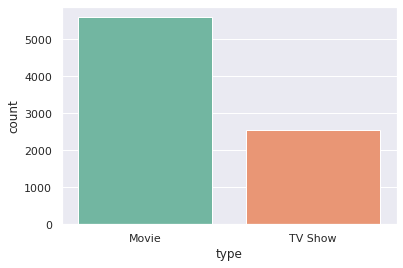

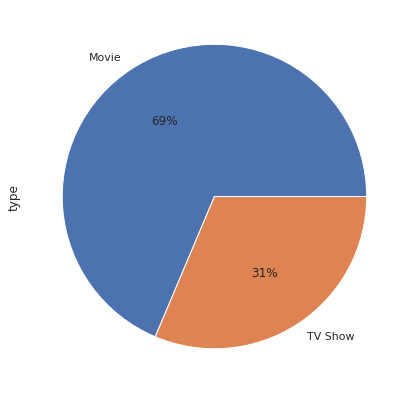

In [ ]:
netflix_shows = netflix[netflix['type']=='TV Shows']
netflix_movies = netflix[netflix['type']=='Movie']
#Time for visulization
sns.set(style='darkgrid')
ax = sns.countplot(x='type', data=netflix, palette='Set2')

plt.figure(figsize=(7, 7))
netflix['type'].value_counts().plot(kind='pie',autopct='%1.0f%%')

**MOVIE RATING ANALYSIS**

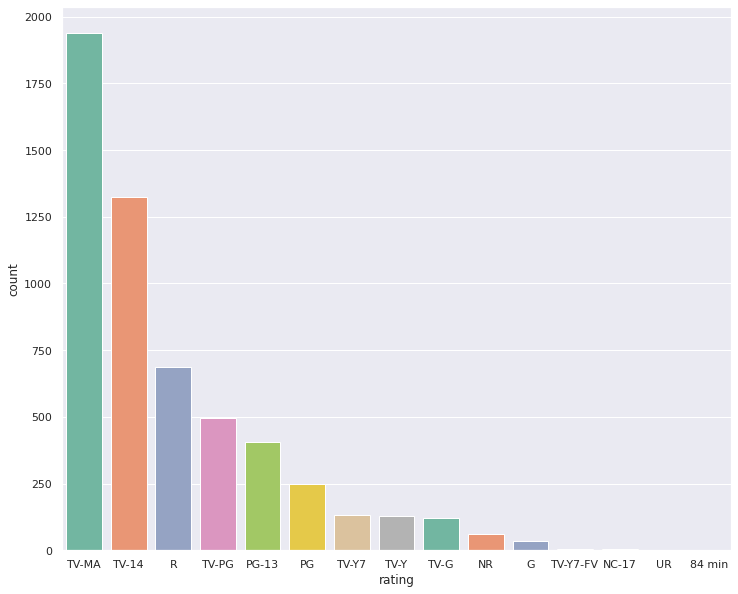

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_movies, palette="Set2", order=netflix_movies['rating'].value_counts().index[0:15])

The largest count of movies are made with the 'TV-MA' rating."TV-MA" is a rating assigned by the TV Parental Guidelines to a television program that was designed for mature audiences only.

Second largest is the 'TV-14' stands for content that may be inappropriate for children younger than 14 years of age.

TOP 10 COUNTRIES WITH MOVIES AND SHOWS IN NETFLIX

Text(0.5, 1.0, 'Top 10 countries with movies and tv shows')

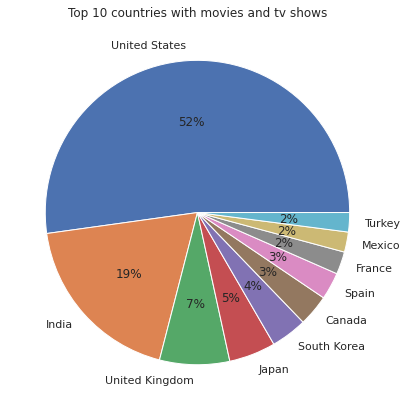

In [ ]:
values = netflix['country'].value_counts()[:10].tolist()
labels = netflix['country'].value_counts()[:10].index.tolist()
plt.figure(figsize=(7, 7))
plt.pie(values,labels=labels,autopct='%1.0f%%')
plt.title('Top 10 countries with movies and tv shows')

CONTENT ADDED BY YEARS 


In [ ]:
netflix['rating'].value_counts()

TV-MA       3051
TV-14       2025
TV-PG        792
R            687
PG-13        407
TV-Y7        315
TV-Y         301
PG           249
TV-G         208
NR            66
G             35
TV-Y7-FV       6
NC-17          3
UR             2
84 min         1
74 min         1
66 min         1
Name: rating, dtype: int64

In [ ]:
netflix['date_added'] = netflix['date_added'].fillna(netflix['date_added'].mode()[0])

In [ ]:
date = pd.DataFrame(netflix['date_added'])
added = date['date_added'].str.split(', ',expand = True)
date['MD'] = added[0]
date['Year'] = added[1]
date.head()

,date_added,MD,Year
0,"September 25, 2021",September 25,2021
1,"September 24, 2021",September 24,2021
2,"September 24, 2021",September 24,2021
3,"September 24, 2021",September 24,2021
4,"September 24, 2021",September 24,2021


year wise analysis

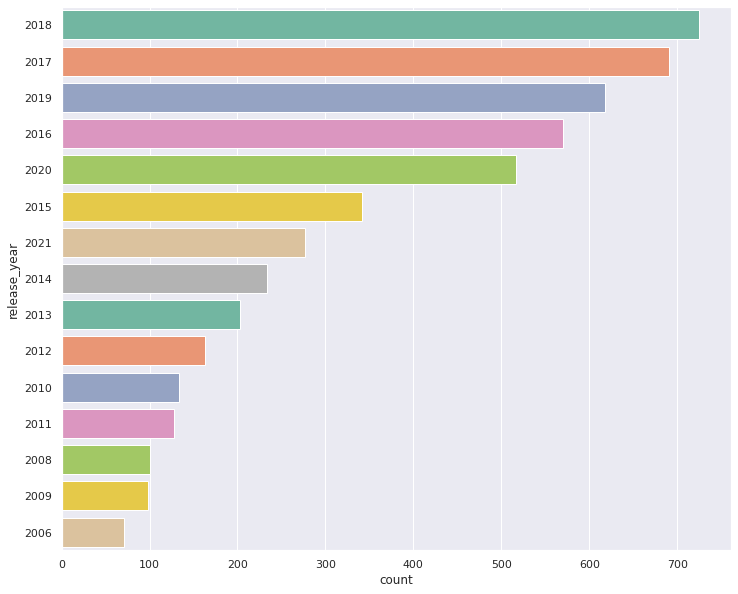

In [ ]:
plt.figure(figsize=(12,10))
sns.set(style='darkgrid')
ax = sns.countplot(y='release_year', data=netflix_movies, palette='Set2', order=netflix_movies['release_year'].value_counts().index[0:15])

top 10 content creating countries

> Indented block



In [ ]:
countries={}
netflix_movies['country']=netflix_movies['country'].fillna('Unknown')
cou=list(netflix_movies['country'])
for i in cou:
    #print(i)
    i=list(i.split(','))
    if len(i)==1:
        if i in list(countries.keys()):
            countries[i]+=1
        else:
            countries[i[0]]=1
    else:
        for j in i:
            if j in list(countries.keys()):
                countries[j]+=1
            else:
                countries[j]=1
countries_fin={}
for country,no in countries.items():
    country=country.replace(' ','')
    if country in list(countries_fin.keys()):
        countries_fin[country]+=no
    else:
        countries_fin[country]=no
        
countries_fin={k: v for k, v in sorted(countries_fin.items(), key=lambda item: item[1], reverse= True)}

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


[Text(0, 0, 'UnitedStates'),
 Text(0, 0, 'France'),
 Text(0, 0, 'UnitedKingdom'),
 Text(0, 0, 'Canada'),
 Text(0, 0, 'Germany'),
 Text(0, 0, 'Belgium'),
 Text(0, 0, 'China'),
 Text(0, 0, 'Spain'),
 Text(0, 0, 'Australia'),
 Text(0, 0, 'Japan')]

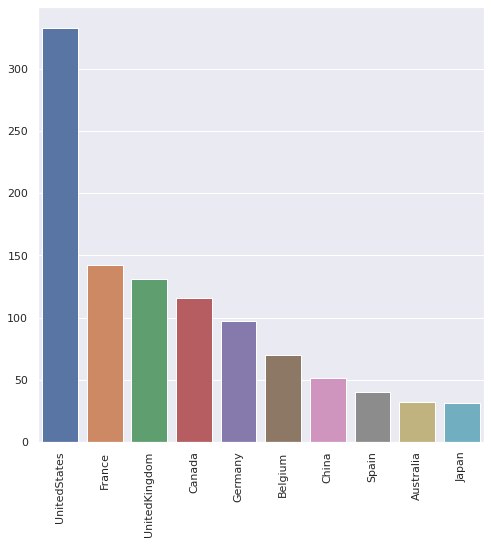

In [ ]:
plt.figure(figsize=(8,8))
ax = sns.barplot(x=list(countries_fin.keys())[0:10],y=list(countries_fin.values())[0:10])
ax.set_xticklabels(list(countries_fin.keys())[0:10],rotation = 90)

DATA CLEANING

In [ ]:
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2518
cast             747
country          803
date_added         0
release_year       0
rating             4
duration           4
listed_in          1
description        1
dtype: int64

if the null value is not in NAN format the python does not consider it as none values. so the below code is used to handle that type of situations...

In [ ]:
missing_values = ['Na','n/a','NA']
netflix = pd.read_csv('/content/netflix_titles.csv',na_values=missing_values)
netflix.isnull().sum()

show_id            0
type               0
title              0
director        2518
cast             747
country          803
date_added         9
release_year       0
rating             4
duration           4
listed_in          1
description        1
dtype: int64

showing null values in a heat map

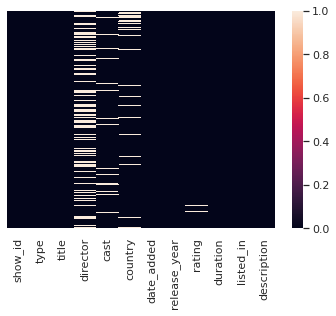

In [ ]:
sns.heatmap(netflix.isnull(), yticklabels=False)

removing the missing values

In [ ]:
netflix.dropna

<bound method DataFrame.dropna of      show_id  ...                                        description
0         s1  ...  As her father nears the end of his life, filmm...
1         s2  ...  After crossing paths at a party, a Cape Town t...
2         s3  ...  To protect his family from a powerful drug lor...
3         s4  ...  Feuds, flirtations and toilet talk go down amo...
4         s5  ...  In a city of coaching centers known to train I...
...      ...  ...                                                ...
8149   s8150  ...  A man and a woman on the run from the law are ...
8150   s8151  ...  A night out in Paris quickly unravels when two...
8151   s8152  ...  After being shipwrecked off the African coast,...
8152   s8153  ...  How did the King of the Jungle ascend to the t...
8153   s8154  ...                                                NaN

[8154 rows x 12 columns]>

fill the missing values with 0

In [ ]:
netflix.fillna(0)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,0,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,0,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",0,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,0,0,0,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,0,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8149,s8150,Movie,Tamanchey,Navneet Behal,"Nikhil Dwivedi, Richa Chadha, Damandeep Singh ...",India,"October 15, 2017",2014,TV-MA,111 min,"Action & Adventure, International Movies, Roma...",A man and a woman on the run from the law are ...
8150,s8151,Movie,Tarif de nuit,Julien Seri,"Jonathan Howard, Jonathan Demurger, Fanny Vale...",France,"March 1, 2018",2015,TV-MA,81 min,"International Movies, Thrillers",A night out in Paris quickly unravels when two...
8151,s8152,Movie,Tarzan,"Chris Buck, Kevin Lima","Tony Goldwyn, Minnie Driver, Glenn Close, Bria...",United States,"June 23, 2018",1999,G,89 min,Children & Family Movies,"After being shipwrecked off the African coast,..."
8152,s8153,Movie,Tarzan 2,Brian Smith,"Harrison Chad, George Carlin, Brad Garrett, Ro...",United States,"June 23, 2017",2005,G,72 min,Children & Family Movies,How did the King of the Jungle ascend to the t...


but filling every none value with zero is not correct lets find a new method...

In [ ]:
netflix.fillna(method='ffill')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,Kirsten Johnson,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",South Africa,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",South Africa,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,Julien Leclercq,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8149,s8150,Movie,Tamanchey,Navneet Behal,"Nikhil Dwivedi, Richa Chadha, Damandeep Singh ...",India,"October 15, 2017",2014,TV-MA,111 min,"Action & Adventure, International Movies, Roma...",A man and a woman on the run from the law are ...
8150,s8151,Movie,Tarif de nuit,Julien Seri,"Jonathan Howard, Jonathan Demurger, Fanny Vale...",France,"March 1, 2018",2015,TV-MA,81 min,"International Movies, Thrillers",A night out in Paris quickly unravels when two...
8151,s8152,Movie,Tarzan,"Chris Buck, Kevin Lima","Tony Goldwyn, Minnie Driver, Glenn Close, Bria...",United States,"June 23, 2018",1999,G,89 min,Children & Family Movies,"After being shipwrecked off the African coast,..."
8152,s8153,Movie,Tarzan 2,Brian Smith,"Harrison Chad, George Carlin, Brad Garrett, Ro...",United States,"June 23, 2017",2005,G,72 min,Children & Family Movies,How did the King of the Jungle ascend to the t...


it is also not a convinient method to solve the above issue but it is the better one 
another method that is interpolate which means average

In [ ]:
netflix.interpolate()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8149,s8150,Movie,Tamanchey,Navneet Behal,"Nikhil Dwivedi, Richa Chadha, Damandeep Singh ...",India,"October 15, 2017",2014,TV-MA,111 min,"Action & Adventure, International Movies, Roma...",A man and a woman on the run from the law are ...
8150,s8151,Movie,Tarif de nuit,Julien Seri,"Jonathan Howard, Jonathan Demurger, Fanny Vale...",France,"March 1, 2018",2015,TV-MA,81 min,"International Movies, Thrillers",A night out in Paris quickly unravels when two...
8151,s8152,Movie,Tarzan,"Chris Buck, Kevin Lima","Tony Goldwyn, Minnie Driver, Glenn Close, Bria...",United States,"June 23, 2018",1999,G,89 min,Children & Family Movies,"After being shipwrecked off the African coast,..."
8152,s8153,Movie,Tarzan 2,Brian Smith,"Harrison Chad, George Carlin, Brad Garrett, Ro...",United States,"June 23, 2017",2005,G,72 min,Children & Family Movies,How did the King of the Jungle ascend to the t...


train-test splits using sklearn

In [ ]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(netflix, test_size=0.20, random_state=42)    #test = 20% and train = 80%


In [ ]:

len(test)   #20%

1631

In [ ]:
len(train)   #80%

6523

In [ ]:
len(netflix)    #100%

8154

showing the first 5 rows of trainning dataset and testing dataset...

In [ ]:
train.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
293,s294,Movie,Slay,Adze Ugah,"Enhle Mbali, Ramsey Nouah, Dawn Thandeka Kang,...",South Africa,"August 8, 2021",2021,TV-MA,86 min,"Comedies, International Movies, Romantic Movies","In pursuit of both success and validation, a g..."
5960,s5961,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",1997,R,119 min,Dramas,After one of his high school students attacks ...
3790,s3791,Movie,Mere Pyare Prime Minister,Rakeysh Omprakash Mehra,"Anjali Patil, Om Kanojiya, Niteesh Wadhwa, Mak...",India,"May 31, 2019",2019,TV-MA,103 min,"Dramas, International Movies","When his mother suffers a traumatic incident, ..."
3779,s3780,TV Show,Malibu Rescue: The Series,NaN,"Ricardo Hurtado, Breanna Yde, Jackie R. Jacobs...",United States,"June 3, 2019",2019,TV-G,1 Season,"Kids' TV, TV Action & Adventure, TV Comedies","On the heels of Junior Rescue training, Team F..."
6702,s6703,Movie,Equals,Drake Doremus,"Nicholas Hoult, Kristen Stewart, Jacki Weaver,...","United States, Indonesia","October 28, 2018",2015,PG-13,102 min,"Dramas, Romantic Movies, Sci-Fi & Fantasy",Two young lovers depart from the norm simply b...


In [ ]:
test.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4342,s4343,Movie,Line Walker,Jazz Boon,"Nick Cheung, Louis Koo, Francis Chun-Yu Ng, Ch...","China, Hong Kong","December 1, 2018",2016,TV-MA,109 min,"Action & Adventure, Dramas, International Movies",A Hong Kong intelligence officer tasked with f...
1203,s1204,Movie,The BFG,Steven Spielberg,"Mark Rylance, Ruby Barnhill, Penelope Wilton, ...","United States, India, United Kingdom","March 15, 2021",2016,PG,118 min,"Children & Family Movies, Dramas",A little orphan meets up with a kind giant who...
7127,s7128,Movie,Jesus: Countdown to Calvary,Gerry Hoban,Hugh Bonneville,"Ireland, United States, France","April 1, 2019",2018,TV-14,53 min,"Documentaries, Faith & Spirituality",Host Hugh Bonneville traces Jesus' last days t...
1758,s1759,TV Show,LEGO Ninjago,NaN,"Michael Adamthwaite, Paul Dobson, Kelly Metzge...",Canada,"November 1, 2020",2020,TV-Y7,2 Seasons,Kids' TV,While fighting foes across Ninjago City and be...
927,s928,TV Show,Barney and Friends,NaN,"Bob West, Julie Johnson, David Joyner, Jeff Ay...",NaN,"May 1, 2021",2010,TV-Y,2 Seasons,Kids' TV,"Barney the purple dinosaur, Baby Bop and B.J. ..."


In [ ]:
train2, val = train_test_split(train,test_size=0.20,random_state=42)

In [ ]:
val.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5468,s5469,Movie,Sarah Silverman A Speck of Dust,Liam Lynch,Sarah Silverman,United States,"May 30, 2017",2017,TV-MA,71 min,Stand-Up Comedy,"In her first comedy special post-health scare,..."
6402,s6403,Movie,Cake,Asim Abbasi,"Aamina Sheikh, Sanam Saeed, Adnan Malik, Moham...","United Kingdom, Pakistan","May 15, 2019",2018,TV-MA,125 min,"Comedies, Dramas, International Movies",When their aging father’s illness reunites two...
5980,s5981,Movie,1 Mile to You,Leif Tilden,"Billy Crudup, Graham Rogers, Liana Liberato, S...",United States,"July 7, 2017",2017,TV-14,105 min,"Dramas, Romantic Movies, Sports Movies",After escaping the bus accident that killed hi...
5347,s5348,TV Show,Bountiful Blessings,NaN,"Jessica Hsuan, Tay Ping Hui, Thomas Ong, Jeffr...",Singapore,"August 1, 2017",2011,TV-14,1 Season,"International TV Shows, TV Dramas, TV Sci-Fi &...",A former mortal who is now the Kitchen God coo...
3983,s3984,Movie,ReMastered: The Miami Showband Massacre,Stuart Sender,NaN,United States,"March 22, 2019",2019,TV-MA,71 min,"Documentaries, Music & Musicals",The killing of three members of the Miami Show...


In [ ]:
y = netflix['release_year']
y

0       2020
1       2021
2       2021
3       2021
4       2021
        ... 
8149    2014
8150    2015
8151    1999
8152    2005
8153    2013
Name: release_year, Length: 8154, dtype: int64

In [ ]:
x = netflix.drop(columns='release_year')
x.head()

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.20,random_state=42)

In [ ]:
x_train.head()

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
293,s294,Movie,Slay,Adze Ugah,"Enhle Mbali, Ramsey Nouah, Dawn Thandeka Kang,...",South Africa,"August 8, 2021",TV-MA,86 min,"Comedies, International Movies, Romantic Movies","In pursuit of both success and validation, a g..."
5960,s5961,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,"November 1, 2019",R,119 min,Dramas,After one of his high school students attacks ...
3790,s3791,Movie,Mere Pyare Prime Minister,Rakeysh Omprakash Mehra,"Anjali Patil, Om Kanojiya, Niteesh Wadhwa, Mak...",India,"May 31, 2019",TV-MA,103 min,"Dramas, International Movies","When his mother suffers a traumatic incident, ..."
3779,s3780,TV Show,Malibu Rescue: The Series,NaN,"Ricardo Hurtado, Breanna Yde, Jackie R. Jacobs...",United States,"June 3, 2019",TV-G,1 Season,"Kids' TV, TV Action & Adventure, TV Comedies","On the heels of Junior Rescue training, Team F..."
6702,s6703,Movie,Equals,Drake Doremus,"Nicholas Hoult, Kristen Stewart, Jacki Weaver,...","United States, Indonesia","October 28, 2018",PG-13,102 min,"Dramas, Romantic Movies, Sci-Fi & Fantasy",Two young lovers depart from the norm simply b...


In [ ]:
y_train

293     2021
5960    1997
3790    2019
3779    2019
6702    2015
        ... 
5226    2017
5390    2014
860     2020
7603    2017
7270    2015
Name: release_year, Length: 6523, dtype: int64

In [ ]:
x_test.head()

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
4342,s4343,Movie,Line Walker,Jazz Boon,"Nick Cheung, Louis Koo, Francis Chun-Yu Ng, Ch...","China, Hong Kong","December 1, 2018",TV-MA,109 min,"Action & Adventure, Dramas, International Movies",A Hong Kong intelligence officer tasked with f...
1203,s1204,Movie,The BFG,Steven Spielberg,"Mark Rylance, Ruby Barnhill, Penelope Wilton, ...","United States, India, United Kingdom","March 15, 2021",PG,118 min,"Children & Family Movies, Dramas",A little orphan meets up with a kind giant who...
7127,s7128,Movie,Jesus: Countdown to Calvary,Gerry Hoban,Hugh Bonneville,"Ireland, United States, France","April 1, 2019",TV-14,53 min,"Documentaries, Faith & Spirituality",Host Hugh Bonneville traces Jesus' last days t...
1758,s1759,TV Show,LEGO Ninjago,NaN,"Michael Adamthwaite, Paul Dobson, Kelly Metzge...",Canada,"November 1, 2020",TV-Y7,2 Seasons,Kids' TV,While fighting foes across Ninjago City and be...
927,s928,TV Show,Barney and Friends,NaN,"Bob West, Julie Johnson, David Joyner, Jeff Ay...",NaN,"May 1, 2021",TV-Y,2 Seasons,Kids' TV,"Barney the purple dinosaur, Baby Bop and B.J. ..."


In [ ]:
y_test

4342    2016
1203    2016
7127    2018
1758    2020
927     2010
        ... 
5050    2017
6950    2017
7486    2016
5060    2018
6920    2017
Name: release_year, Length: 1631, dtype: int64

that's it for splitting the data set into training and testing 
note: if you are not giving the test size automatically the python takes it as 0.25 means off 25% and 75% 

**RECOMMENDATIONS**

creating model

In [ ]:
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import plot_tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
print('Decision Tree Classifier Created')


Decision Tree Classifier Created


In [ ]:
rec = netflix[['title','director','cast','listed_in','description']]
rec.head()

,title,director,cast,listed_in,description
0,Dick Johnson Is Dead,Kirsten Johnson,NaN,Documentaries,"As her father nears the end of his life, filmm..."
1,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...","International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...","Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,Jailbirds New Orleans,NaN,NaN,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...","International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
rec.isnull().sum()

title             0
director       2518
cast            747
listed_in         1
description       1
dtype: int64

In [ ]:
rec['director'].replace(np.nan,'unknown',inplace=True)
rec['cast'].replace(np.nan,'unknown',inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4582: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [ ]:
rec['cast'] = rec['cast'].str.replace(', ',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
rec['listed_in'] = rec['listed_in'].str.replace(', ',' ')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
rec['combined'] = rec['title'] + ' ' + rec['director'] + ' ' + rec['cast'] + ' ' + rec['listed_in'] + ' ' + rec['description']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
rec.drop(['cast','director','listed_in','description'],axis=1,inplace=True, errors='ignore')

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4174: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
rec.head()

,title,combined
0,Dick Johnson Is Dead,Dick Johnson Is Dead Kirsten Johnson unknown D...
1,Blood & Water,Blood & Water unknown Ama Qamata Khosi Ngema G...
2,Ganglands,Ganglands Julien Leclercq Sami Bouajila Tracy ...
3,Jailbirds New Orleans,Jailbirds New Orleans unknown unknown Docuseri...
4,Kota Factory,Kota Factory unknown Mayur More Jitendra Kumar...


In [ ]:
rec['combined'][1]

'Blood & Water unknown Ama Qamata Khosi Ngema Gail Mabalane Thabang Molaba Dillon Windvogel Natasha Thahane Arno Greeff Xolile Tshabalala Getmore Sithole Cindy Mahlangu Ryle De Morny Greteli Fincham Sello Maake Ka-Ncube Odwa Gwanya Mekaila Mathys Sandi Schultz Duane Williams Shamilla Miller Patrick Mofokeng International TV Shows TV Dramas TV Mysteries After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(rec['combined'].str.lower())

tfidf_matrix.shape

AttributeError: ignored

In [ ]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
print(rec.index)

In [ ]:
indices = pd.Series(rec.index, index=rec['title']).drop_duplicates()
type(indices)

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    try:
        idx = indices[title]
    except:
        return None
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    match = [i[0] for i in sim_scores]
    score = [i[1] for i in sim_scores]
    dictionary = dict(zip(match, score))
    return dictionary

In [ ]:
def recommend(title):
    result = get_recommendations(title)
    #print(result)
    if result is None:
        print(f'{title} not found in database')
    else:
        print(f'Movie related to {title} are: ')
        for i in result:
            print(f"{rec['title'].iloc[i]} with score {result[i]*100:.2f} %")

In [ ]:
recommend('Blood & Water')

the above recommendations are usefull for the viewer to watch the content....